In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Loading processed data...")

# Load data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"✅ Data loaded!")
print(f"   Training set: {X_train.shape}")
print(f"   Test set: {X_test.shape}")
print(f"   Readmission rate: {y_train.mean():.2%}")

Loading processed data...
✅ Data loaded!
   Training set: (81412, 14)
   Test set: (20354, 14)
   Readmission rate: 11.16%



MODEL 1: LOGISTIC REGRESSION (Baseline)

Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.48      0.01      0.03      2271

    accuracy                           0.89     20354
   macro avg       0.68      0.51      0.48     20354
weighted avg       0.84      0.89      0.84     20354

Accuracy: 0.888
AUC-ROC: 0.644


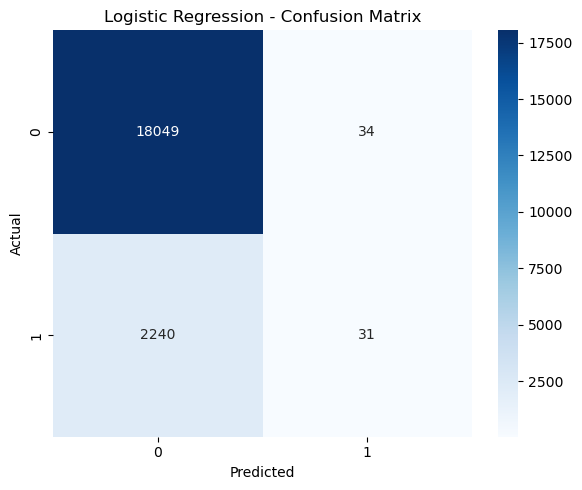

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("\n" + "="*50)
print("MODEL 1: LOGISTIC REGRESSION (Baseline)")
print("="*50)

# Train model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nResults:")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy: {accuracy:.3f}")
print(f"AUC-ROC: {auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('../visualizations/lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


MODEL 2: RANDOM FOREST

Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.41      0.02      0.04      2271

    accuracy                           0.89     20354
   macro avg       0.65      0.51      0.49     20354
weighted avg       0.84      0.89      0.84     20354

Accuracy: 0.887
AUC-ROC: 0.634


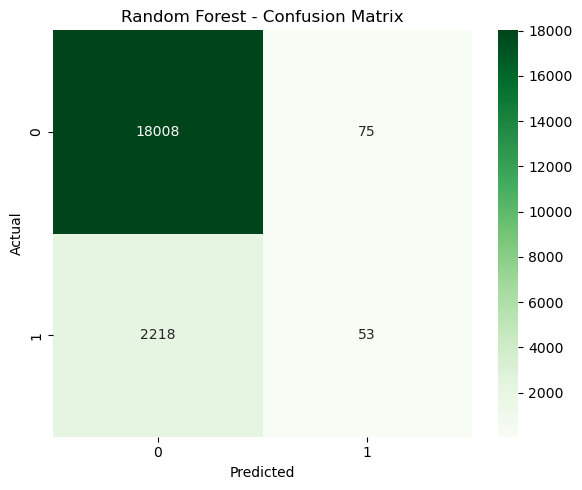

In [3]:
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*50)
print("MODEL 2: RANDOM FOREST")
print("="*50)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nResults:")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {accuracy_rf:.3f}")
print(f"AUC-ROC: {auc_rf:.3f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('../visualizations/rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



MODEL 3: XGBOOST

Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.48      0.01      0.01      2271

    accuracy                           0.89     20354
   macro avg       0.69      0.50      0.48     20354
weighted avg       0.84      0.89      0.84     20354

Accuracy: 0.888
AUC-ROC: 0.681


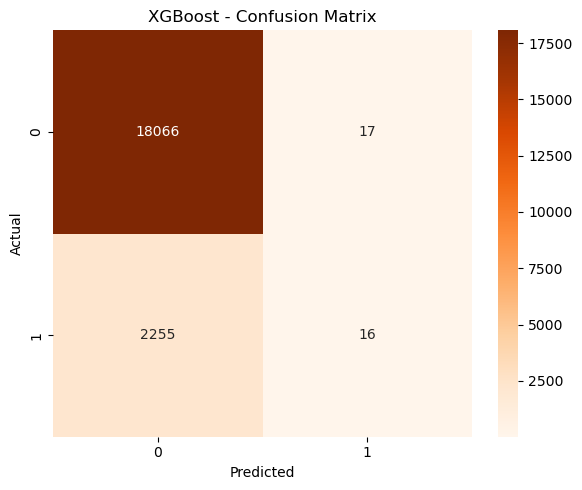

In [4]:
!pip install xgboost
from xgboost import XGBClassifier

print("\n" + "="*50)
print("MODEL 3: XGBOOST")
print("="*50)

# Train model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nResults:")
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"AUC-ROC: {auc_xgb:.3f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('../visualizations/xgb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


MODEL COMPARISON
                 Model  Accuracy   AUC-ROC
0  Logistic Regression  0.888277  0.643849
1        Random Forest  0.887344  0.633948
2              XGBoost  0.888376  0.681012


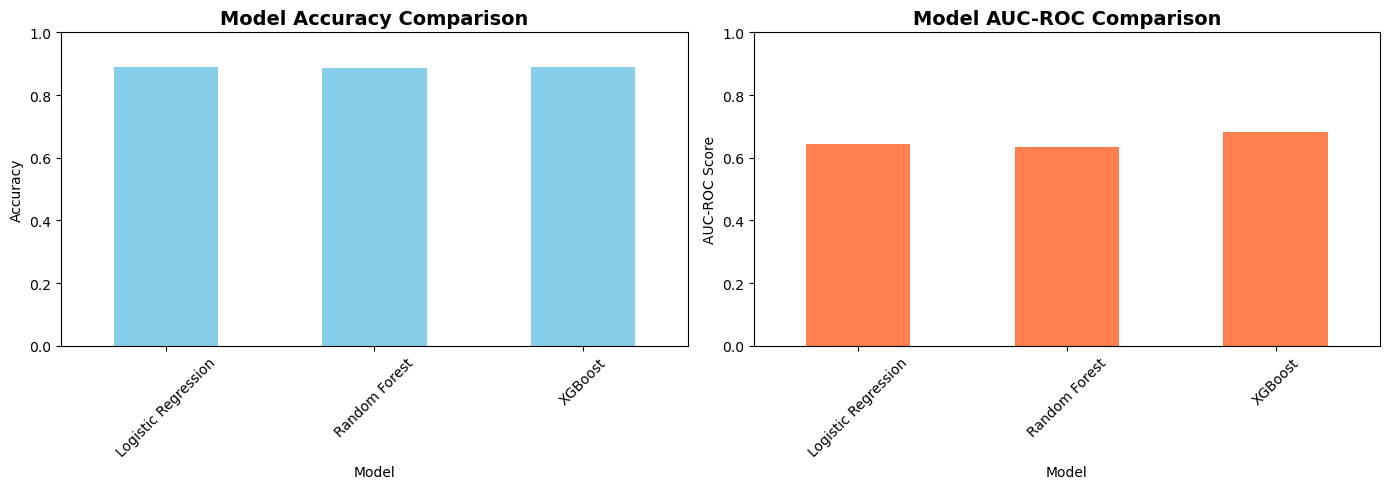


🏆 Best Model: XGBoost
   AUC-ROC: 0.681


In [5]:
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb],
    'AUC-ROC': [auc, auc_rf, auc_xgb]
})

print(results)

# Visualize comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
results.plot(x='Model', y='Accuracy', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)
ax[0].tick_params(axis='x', rotation=45)

# AUC comparison
results.plot(x='Model', y='AUC-ROC', kind='bar', ax=ax[1], color='coral', legend=False)
ax[1].set_title('Model AUC-ROC Comparison', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AUC-ROC Score')
ax[1].set_ylim(0, 1)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../visualizations/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify best model
best_model_idx = results['AUC-ROC'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_auc = results.loc[best_model_idx, 'AUC-ROC']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   AUC-ROC: {best_auc:.3f}")


FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features:
                     Feature  Importance
9           number_inpatient    0.485157
1   discharge_disposition_id    0.128132
12              total_visits    0.053890
10          number_diagnoses    0.044360
8           number_emergency    0.037909
2        admission_source_id    0.035749
3           time_in_hospital    0.034694
5             num_procedures    0.034060
0          admission_type_id    0.033395
11               age_numeric    0.032745
6            num_medications    0.028578
4         num_lab_procedures    0.026567
7          number_outpatient    0.024764
13                a1c_tested    0.000000


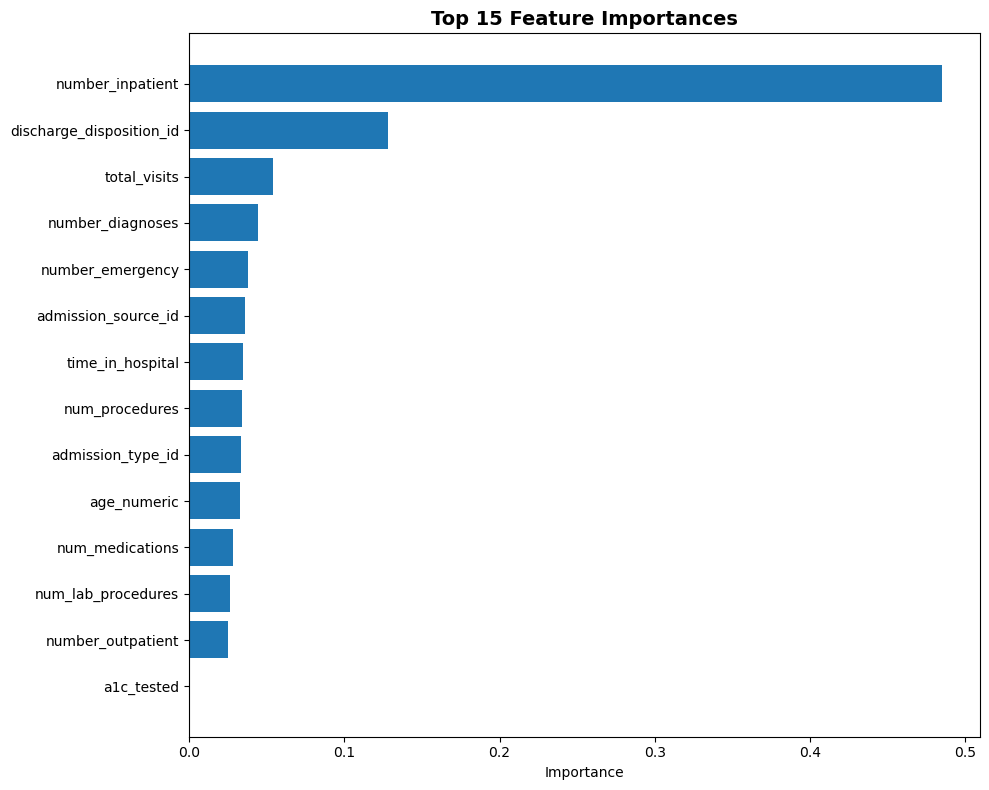


✅ Feature importance saved!


In [6]:
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from best model (usually XGBoost or Random Forest)
# Using XGBoost here
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize
plt.figure(figsize=(10, 8))
top_15 = feature_importance.head(15)
plt.barh(range(len(top_15)), top_15['Importance'])
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Save feature importance
feature_importance.to_csv('../models/feature_importance.csv', index=False)
print("\n✅ Feature importance saved!")


ROC CURVE ANALYSIS


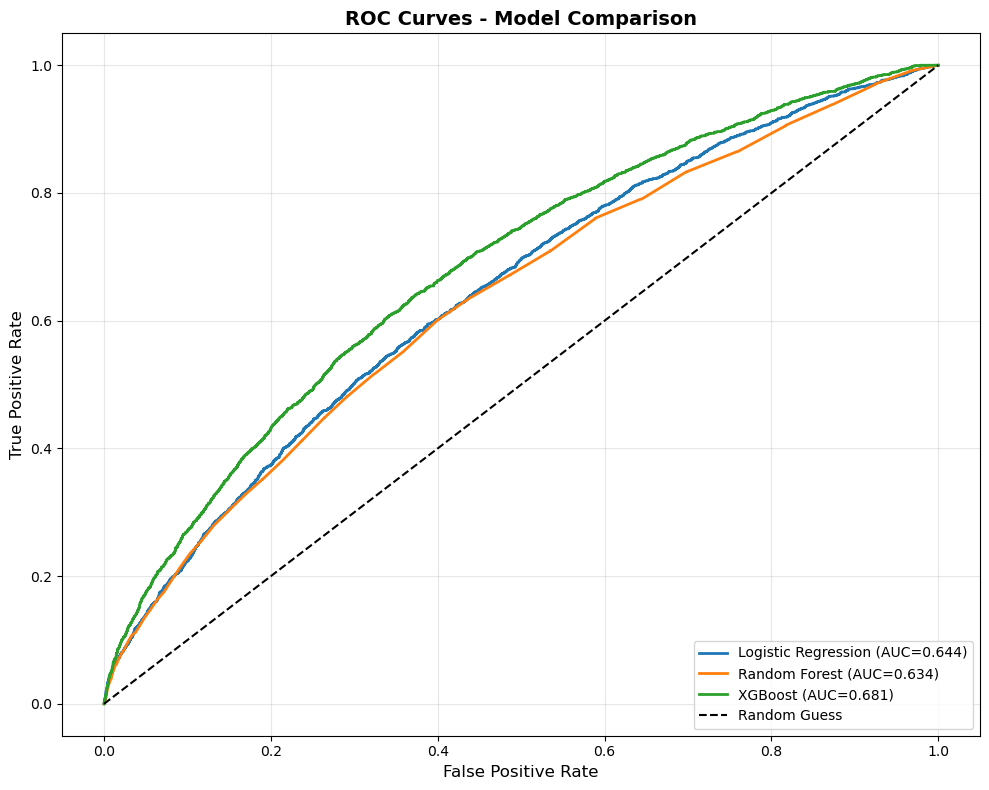

In [7]:
from sklearn.metrics import roc_curve

print("\n" + "="*50)
print("ROC CURVE ANALYSIS")
print("="*50)

# Calculate ROC curve for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
print("\n" + "="*50)
print("BUSINESS IMPACT ANALYSIS")
print("="*50)

# Using best model predictions (XGBoost)
cm = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix Breakdown:")
print(f"  True Negatives (Correct non-readmission): {tn:,}")
print(f"  False Positives (False alarms): {fp:,}")
print(f"  False Negatives (Missed readmissions): {fn:,}")
print(f"  True Positives (Caught readmissions): {tp:,}")

# Business assumptions
avg_readmission_cost = 15000  # Cost of one readmission
intervention_cost = 500       # Cost to intervene (follow-up, care coordination)
intervention_success_rate = 0.30  # 30% of interventions prevent readmission

print("\n" + "="*50)
print("FINANCIAL IMPACT CALCULATION")
print("="*50)

# Calculate savings
patients_correctly_identified = tp
patients_missed = fn
interventions_performed = tp + fp  # We intervene on all predicted positives

# Successful interventions (prevented readmissions)
prevented_readmissions = patients_correctly_identified * intervention_success_rate

# Costs and savings
total_intervention_cost = interventions_performed * intervention_cost
savings_from_prevented = prevented_readmissions * avg_readmission_cost
net_benefit = savings_from_prevented - total_intervention_cost

print(f"\n📊 Metrics:")
print(f"   Readmissions correctly identified: {patients_correctly_identified}/{patients_correctly_identified + patients_missed} ({tp/(tp+fn)*100:.1f}%)")
print(f"   Interventions performed: {interventions_performed:,}")
print(f"   Estimated prevented readmissions: {prevented_readmissions:.0f}")

print(f"\n💰 Financial Impact:")
print(f"   Cost of interventions: ${total_intervention_cost:,.0f}")
print(f"   Savings from prevention: ${savings_from_prevented:,.0f}")
print(f"   Net benefit: ${net_benefit:,.0f}")
print(f"   ROI: {(net_benefit/total_intervention_cost)*100:.1f}%")

# Per-patient metrics
if len(y_test) > 0:
    annual_patients = len(y_test) * 5  # Extrapolate (test set is 20% of data, so 5x for annual)
    annual_net_benefit = net_benefit * 5
    print(f"\n📈 Annual Projection:")
    print(f"   Annual patient volume: ~{annual_patients:,}")
    print(f"   Projected annual savings: ${annual_net_benefit:,.0f}")


BUSINESS IMPACT ANALYSIS
Confusion Matrix Breakdown:
  True Negatives (Correct non-readmission): 18,066
  False Positives (False alarms): 17
  False Negatives (Missed readmissions): 2,255
  True Positives (Caught readmissions): 16

FINANCIAL IMPACT CALCULATION

📊 Metrics:
   Readmissions correctly identified: 16/2271 (0.7%)
   Interventions performed: 33
   Estimated prevented readmissions: 5

💰 Financial Impact:
   Cost of interventions: $16,500
   Savings from prevention: $72,000
   Net benefit: $55,500
   ROI: 336.4%

📈 Annual Projection:
   Annual patient volume: ~101,770
   Projected annual savings: $277,500


In [9]:
print("\n" + "="*50)
print("SAVING BEST MODEL")
print("="*50)

# Save XGBoost (our best model)
joblib.dump(xgb_model, '../models/best_model.pkl')
print("✅ Model saved to: models/best_model.pkl")

# Save model performance metrics
model_metrics = {
    'model_name': 'XGBoost',
    'accuracy': accuracy_xgb,
    'auc_roc': auc_xgb,
    'true_positives': int(tp),
    'true_negatives': int(tn),
    'false_positives': int(fp),
    'false_negatives': int(fn)
}

import json
with open('../models/model_metrics.json', 'w') as f:
    json.dump(model_metrics, f, indent=4)

print("✅ Metrics saved to: models/model_metrics.json")


SAVING BEST MODEL
✅ Model saved to: models/best_model.pkl
✅ Metrics saved to: models/model_metrics.json


In [10]:
print("\n" + "="*60)
print(" "*15 + "MODELING COMPLETE! 🎉")
print("="*60)

print("\n🏆 BEST MODEL: XGBoost")
print(f"   Accuracy: {accuracy_xgb:.1%}")
print(f"   AUC-ROC: {auc_xgb:.3f}")
print(f"   Recall (catching readmissions): {tp/(tp+fn):.1%}")

print("\n💡 TOP 5 RISK FACTORS:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {i+1}. {row['Feature']}")

print("\n💰 BUSINESS IMPACT:")
print(f"   Estimated annual savings: ${annual_net_benefit:,.0f}")
print(f"   ROI: {(net_benefit/total_intervention_cost)*100:.0f}%")




               MODELING COMPLETE! 🎉

🏆 BEST MODEL: XGBoost
   Accuracy: 88.8%
   AUC-ROC: 0.681
   Recall (catching readmissions): 0.7%

💡 TOP 5 RISK FACTORS:
   10. number_inpatient
   2. discharge_disposition_id
   13. total_visits
   11. number_diagnoses
   9. number_emergency

💰 BUSINESS IMPACT:
   Estimated annual savings: $277,500
   ROI: 336%
